In [1]:
# numpy and pandas for data manipulation
import csv
import numpy as np
import pandas as pd

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#plot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# load package# load 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation  import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as XGBT
import catboost as cb

from sklearn.model_selection import KFold
#from paramsearch import paramsearch
from itertools import product,chain
from sklearn.ensemble import RandomForestClassifier

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


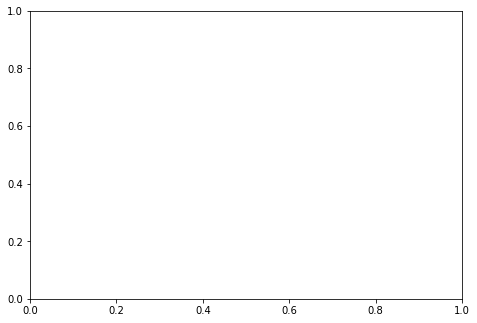

In [2]:
# Import `pyplot`
import matplotlib.pyplot as plt

# Initialize a Figure 
fig = plt.figure()

# Add Axes to the Figure
fig.add_axes([0,0,1,1])

In [3]:
df=pd.read_csv("train.csv", encoding="UTF8")
test=pd.read_csv("test_public.csv")

In [4]:
df_copy=df.copy()

In [5]:
train_url = "https://storage.googleapis.com/francislin/fd1809/train_diss.csv"
df_sec = pd.read_csv(train_url)


### 1. 確認是否有outlier boxplot 看極值

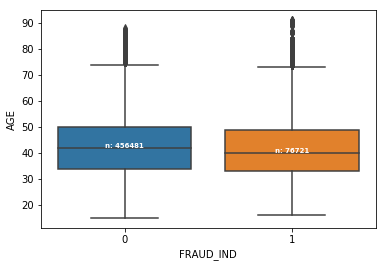

In [285]:
# library & dataset
import seaborn as sns, numpy as np

ax = sns.boxplot(x="FRAUD_IND", y="AGE", data=df)
 
###以下只是為了顯示 obs數量而存在    
# Calculate number of obs per group & median to position labels
medians = df.groupby(['FRAUD_IND'])['AGE'].median().values
nobs = df['FRAUD_IND'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
    horizontalalignment='center', size='x-small', color='w', weight='semibold')

#sns.plt.show()


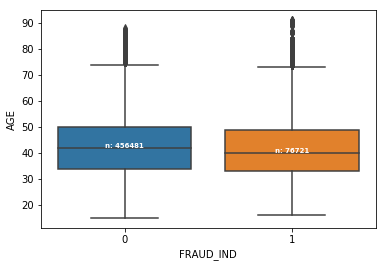

In [293]:
# library & dataset
import seaborn as sns, numpy as np

ax = sns.boxplot(x="FRAUD_IND", y="AGE", data=df)
 
###以下只是為了顯示 obs數量而存在    
# Calculate number of obs per group & median to position labels
medians = df.groupby(['FRAUD_IND'])['AGE'].median().values
nobs = df['FRAUD_IND'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
    horizontalalignment='center', size='x-small', color='w', weight='semibold')

#sns.plt.show()


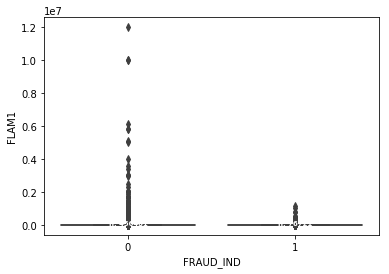

In [294]:
# library & dataset
import seaborn as sns, numpy as np

ax = sns.boxplot(x="FRAUD_IND", y="FLAM1", data=df)
 
###以下只是為了顯示 obs數量而存在    
# Calculate number of obs per group & median to position labels
medians = df.groupby(['FRAUD_IND'])['FLAM1'].median().values
nobs = df['FRAUD_IND'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
    horizontalalignment='center', size='x-small', color='w', weight='semibold')

#sns.plt.show()


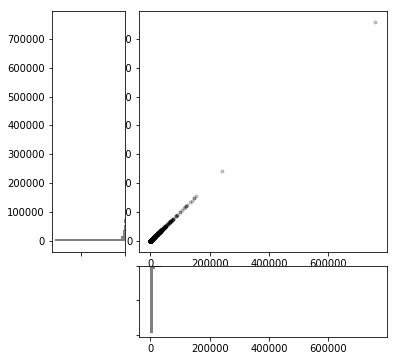

In [295]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x =df_sample.loc[df[df["FRAUD_IND"]==1].index,'FLAM1'].rename('FLAM1')#.sample(n=40000,random_state=13)
y = df_sample.loc[df[df["FRAUD_IND"]==1].index,'FLAM1'].rename('FLAM1')#.sample(n=40000,random_state=13)

# density plot with shade
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

x_hist.hist(x.dropna(), 100, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y.dropna(), 100, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

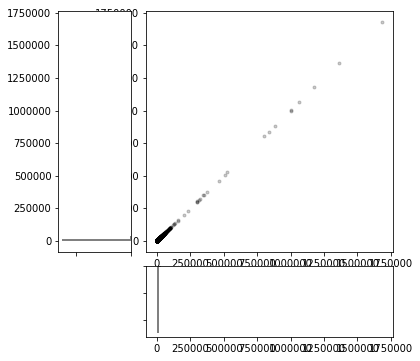

In [296]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x =df_sample.loc[df[df["FRAUD_IND"]==0].index,'FLAM1'].rename('FLAM1')#.sample(n=40000,random_state=13)
y = df_sample.loc[df[df["FRAUD_IND"]==0].index,'FLAM1'].rename('FLAM1')#.sample(n=40000,random_state=13)

# density plot with shade
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

x_hist.hist(x.dropna(), 100, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y.dropna(), 100, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

### 2.確認資料的遺漏值

### 3.確認變數的相關性

### (1) X 離散  Y離散  
* 堆疊長條圖 
#### 舉例： 網路交易與盜刷的關係

In [15]:
pd.crosstab(df.ECFG, df.FRAUD_IND)

FRAUD_IND,0,1
ECFG,,
0,350581,11913
1,105900,64808


In [35]:
ECFG_pt=pd.crosstab(df.FRAUD_IND,df.ECFG,normalize='index')
print (ECFG_pt)

ECFG              0         1
FRAUD_IND                    
0          0.768008  0.231992
1          0.155277  0.844723


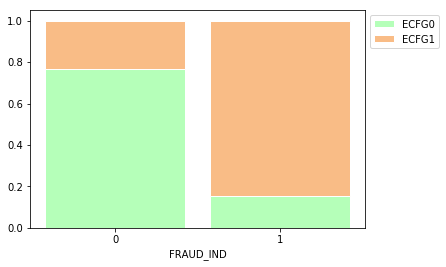

In [50]:
barWidth = 0.85
names= [0,1]

# Create Bars for ECFG 0
plt.bar(names, ECFG_pt.iloc[:,0], color='#b5ffb9', edgecolor='white', width=barWidth, label="ECFG0")
# Create Bars for ECFG 1
plt.bar(names, ECFG_pt.iloc[:,1], bottom=ECFG_pt.iloc[:,0],color='#f9bc86', edgecolor='white', width=barWidth, label="ECFG1")
# Create orange Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth, label="group C")
 
# Custom x axis
plt.xticks(names)
plt.xlabel("FRAUD_IND")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.show()


* chi-square 卡方檢定  
#### chi square 卡方檢定主要用於判斷兩者的相關性，樣本數大於40 使用，不過大到一定的數....  基本上就會判定為有相關

In [105]:
df_sample=df.sample(30000)

In [98]:
EDU_CODE_pt=pd.crosstab(df_sample.FRAUD_IND,df_sample.EDU_CODE)
print (EDU_CODE_pt)

EDU_CODE   1.0  2.0  3.0  4.0  5.0  6.0
FRAUD_IND                              
0           45  353  978  539  439  215
1            6   53  191   71   55   55


In [103]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = EDU_CODE_pt
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)變數相關')
else:
	print('Independent (fail to reject H0)變數不相關')

EDU_CODE   1.0  2.0  3.0  4.0  5.0  6.0
FRAUD_IND                              
0           45  353  978  539  439  215
1            6   53  191   71   55   55
dof=5
[[  43.673       347.67133333 1001.05366667  522.36333333  423.02866667
   231.21      ]
 [   7.327        58.32866667  167.94633333   87.63666667   70.97133333
    38.79      ]]
probability=0.950, critical=11.070, stat=20.340
Dependent (reject H0)
significance=0.050, p=0.001
Dependent (reject H0)變數相關


* fisher-exact 檢定  
#### 總樣本數小於40 使用，不過大到一定的數....  基本上就會判定為有相關

In [101]:
ECFG_cnt=pd.crosstab(df_sample.FRAUD_IND,df_sample.ECFG)
print (ECFG_cnt)

ECFG          0    1
FRAUD_IND           
0          1985  584
1            64  367


In [102]:
grouped_data=ECFG_cnt
if grouped_data.shape == (2,2):
    ptest = 'Fisher''s exact'
    oddsratio, pval = scipy.stats.fisher_exact(grouped_data)
    print (pval)

5.5638807540298195e-139


### (2) x 連續 y離散/ x 離散 y連續 
* 舉例：AGE/CC_VINTAGE

In [110]:
df_sample=df.sample(30000)

* Density Plot

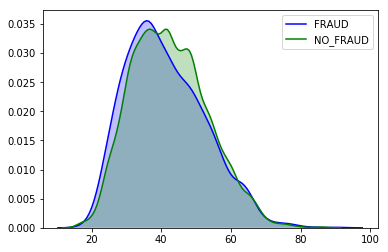

In [380]:
# library & dataset
import seaborn as sns

inputA =df_sample.loc[df_sample[df_sample["FRAUD_IND"]==1].index,'AGE'].rename('FRAUD')
inputB = df_sample.loc[df_sample[df_sample["FRAUD_IND"]==0].index,'AGE'].rename('NO_FRAUD')
# density plot with shade
sns.kdeplot(inputA, shade=True, color='blue')
sns.kdeplot(inputB, shade=True,color='green')
#sns.plt.show()

* Violin Plot

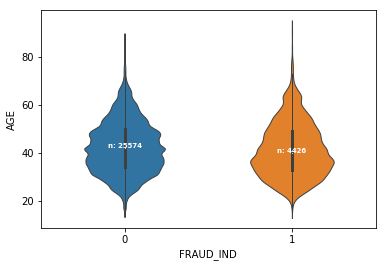

In [385]:
# library & dataset
import seaborn as sns, numpy as np
 
# Basic violinplot
ax = sns.violinplot(x="FRAUD_IND", y="AGE", data=df_sample,linewidth=1,width=0.5)
 
# Calculate number of obs per group & median to position labels
medians = df_sample.groupby(["FRAUD_IND"])["AGE"].median().values
nobs = df_sample["FRAUD_IND"].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')
 
 #sns.plt.show()

* boxplot

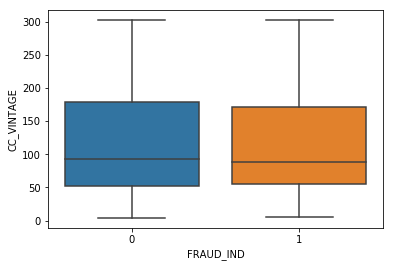

In [275]:
# library & dataset
import seaborn as sns, numpy as np

ax = sns.boxplot(x="FRAUD_IND", y="CC_VINTAGE", data=df)
 

### (3)  X連續 Y連續

* scatter plot  

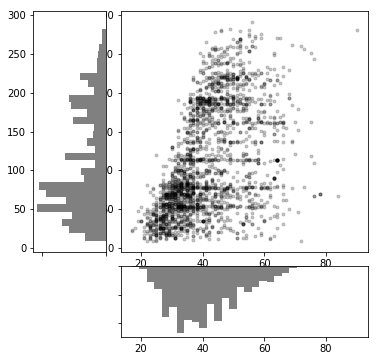

In [373]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x =df_sample.loc[df[df["FRAUD_IND"]==1].index,'AGE'].rename('AGE').sample(n=40000,random_state=13)
y = df_sample.loc[df[df["FRAUD_IND"]==1].index,'CC_VINTAGE'].rename('CC_VINTAGE').sample(n=40000,random_state=13)

# density plot with shade
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes (製圖的資料不能有nan)
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

x_hist.hist(x.dropna(), 30, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y.dropna(), 30, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

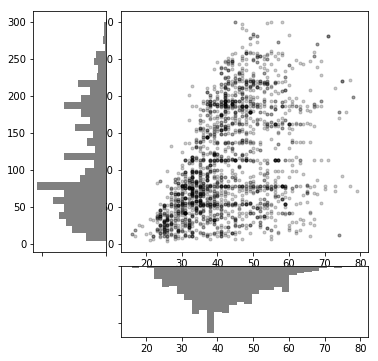

In [375]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x =df_sample.loc[df[df["FRAUD_IND"]==0].index,'AGE'].rename('FLAM1').sample(n=40000,random_state=13)
y = df_sample.loc[df[df["FRAUD_IND"]==0].index,'CC_VINTAGE'].rename('CC_VINTAGE').sample(n=40000,random_state=13)

# density plot with shade
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes  (製圖的資料不能有nan)
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

x_hist.hist(x.dropna(), 30, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y.dropna(), 30, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

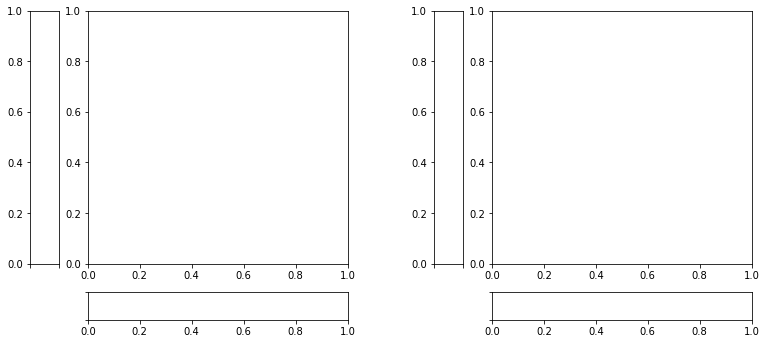

In [388]:
fig = plt.figure(figsize=(15,15))
grid = plt.GridSpec(15, 15, hspace=1, wspace=1)
main_ax = fig.add_subplot(grid[:5, 1:6])
main_ax2 = fig.add_subplot(grid[:5, 8:13])

y_hist = fig.add_subplot(grid[:5, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[5, 1:6], yticklabels=[], sharex=main_ax)

y_hist2 = fig.add_subplot(grid[:5, 7], xticklabels=[], sharey=main_ax2)
x_hist2 = fig.add_subplot(grid[5, 8:13], yticklabels=[], sharex=main_ax2)

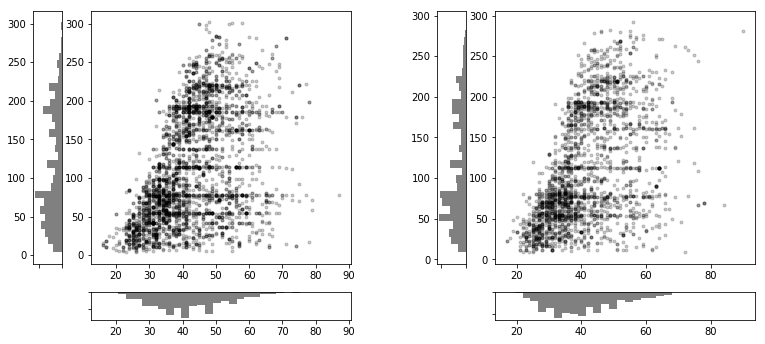

In [387]:
x0 =df_sample.loc[df[df["FRAUD_IND"]==0].index,'AGE'].rename('FLAM1').sample(n=60000,random_state=13)
y0 = df_sample.loc[df[df["FRAUD_IND"]==0].index,'CC_VINTAGE'].rename('CC_VINTAGE').sample(n=60000,random_state=13)

x1 =df_sample.loc[df[df["FRAUD_IND"]==1].index,'AGE'].rename('AGE').sample(n=40000,random_state=13)
y1 = df_sample.loc[df[df["FRAUD_IND"]==1].index,'CC_VINTAGE'].rename('CC_VINTAGE').sample(n=40000,random_state=13)


main_ax.plot(x0, y0, 'ok', markersize=3, alpha=0.2)
main_ax2.plot(x1, y1, 'ok', markersize=3, alpha=0.2)

x_hist.hist(x0.dropna(), 30, histtype='stepfilled',orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y0.dropna(), 30, histtype='stepfilled',orientation='horizontal', color='gray')
y_hist.invert_xaxis()


x_hist2.hist(x1.dropna(), 30, histtype='stepfilled',orientation='vertical', color='gray')
x_hist2.invert_yaxis()

y_hist2.hist(y1.dropna(), 30, histtype='stepfilled',orientation='horizontal', color='gray')
y_hist2.invert_xaxis()

* Pearson's correlation coefficient 皮爾森檢定： X與Y都是常態

In [371]:
df.loc[:,["FLAM1","CC_VINTAGE","AGE"]].corr(method="spearman")

,FLAM1,CC_VINTAGE,AGE
FLAM1,1.000000,0.072463,0.080935
CC_VINTAGE,0.072463,1.000000,0.494002
AGE,0.080935,0.494002,1.000000


* Spearman's rank correlation coefficient 斯皮爾曼等級相關係數 ： X與Y至少一個不是常態 

In [372]:
df.loc[:,["FLAM1","CC_VINTAGE","AGE"]].corr(method="pearson")

,FLAM1,CC_VINTAGE,AGE
FLAM1,1.000000,0.009365,0.017313
CC_VINTAGE,0.009365,1.000000,0.453416
AGE,0.017313,0.453416,1.000000


In [389]:
! pwd

/Users/peggy/Documents/python/kaggle/fraud_dec


In [9]:
df_sec['hour']=round(df_sec['DATETIME']/360)
df_sec.head()

,TXKEY,DATETIME,CHID,CANO,MCHNO,ACQIC,MCC,CONTP,ETYMD,ECFG,...,CURRENT_FEE,CURRENT_INSTALLMENT_BAL,CURRENT_INSTALLMENT_PURCH_AMT,CURRENT_PURCH_AMT,CURRENT_VIO_AMT,LST_CYCLE_UNPAID_BAL,REVOLVING_AMT,REVOLVING_INTEREST,FRAUD_IND,hour
0,NC0100920170501AAAAF,1809216040,2174A3230372839803432201,2307245000005,012017080000080,88547000.0,5399,IP,81.0,1,...,0.0,11528.0,1441.0,9342.0,0.0,0.0,0.0,0.0,0,5025600.0
1,NC0100820170501AAAAP,1809216112,2424E3230372839833338278,1363568000002,0100818122,493817.0,5331,IP,1.0,1,...,0.0,0.0,0.0,11607.0,0.0,0.0,0.0,0.0,0,5025600.0
2,VS0I00120170501AAAD7,1809216311,2144E3230362439703332498,1308636000003,210756000200925,431330.0,5735,IP,1.0,1,...,188.0,0.0,0.0,20217.0,0.0,0.0,0.0,0.0,0,5025601.0
3,NC0100420170501AAABG,1809216312,214473130332239803737250,3162355000001,0100803548,493817.0,5311,IP,1.0,1,...,0.0,39944.0,12057.0,28240.0,0.0,0.0,0.0,0.0,0,5025601.0
4,VS0I00120170501AAAEB,1809216316,276463131300639883755065,3330714000002,210756000200925,431330.0,5735,IP,1.0,1,...,363.0,16030.0,2290.0,39372.0,0.0,0.0,0.0,0.0,1,5025601.0


In [10]:
DATETIME_sec=pd.DataFrame(df_sec.groupby('hour')['FRAUD_IND'].mean())
DATETIME_sec.shape

(67263, 1)

### 日期與盜刷是否有關

In [ ]:
DATETIME=pd.DataFrame(df.groupby('DATETIME')['FRAUD_IND'].mean())

In [ ]:
DATETIME.head()

In [ ]:
DATETIME.shape

In [ ]:
n=303
import matplotlib.pyplot as plot
import numpy as np

# Time series data
data = np.ravel(DATETIME.head(n).values)
# Plot autocorrelation
plot.acorr(data, maxlags=n-1)

# Add labels to autocorrelation plot

plot.title('Autocorrelation of FRAUD_IND')
plot.xlabel('Lag')
plot.ylabel('Autocorrelation')

# Display the autocorrelation plot

plot.show()

In [ ]:
import matplotlib.pyplot as plot

import numpy as np

 

# Time series data

#data = np.array([24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0])
data = np.array([24.0,28.0,6.0,9.0,20.0,7.0,25.0,31.0,40.0,2.0])

# Plot autocorrelation
plot.acorr(data, maxlags=9)

# Add labels to autocorrelation plot

plot.title('Autocorrelation of XYZ stock price data')

plot.xlabel('Lag')

plot.ylabel('Autocorrelation')

 

# Display the autocorrelation plot

plot.show()

In [ ]:
pd.crosstab(bank.job, bank.y, normalize='index'

In [ ]:
CREDIT_AMT.dtypes

In [ ]:
CREDIT_AMT.sort_index(ascending=True)

In [ ]:
df_sec.columns.tolist()

In [276]:
df.FLAM1.unique()

array([1082.01, 2725.35,  418.38, ...,  673.14, 1629.8 , 1090.48])

In [ ]:
 'TXKEY',
 'DATETIME',
 'CHID',
 'CANO',
 'MCHNO',
 'ACQIC',
 'MCC',
 'CONTP',
 'ETYMD',
 'ECFG',
 'INSFG',
 'ITERM',
 'BNSFG',
 'BNSPT',
 'FLAM1',
 'STOCN',
 'SCITY',
 'OVRLT',
 'PAY_TYPE',
 'FALLBACK_IND',
 'AGNO',
 'CATP1',
 'CUORG',
 'FEEFG',
 'FEDFG',
 'CATP2',
 'TSCFG',
 'LSCFG',
 'CGDCT',
 'APPFG',
 'SAMFG',
 'ANDFG',
 'AGE',
 'CC_CUST_LEVEL',
 'CC_VINTAGE',
 'EDU_CODE',
 'GENDER_CODE',
 'INCOME_RANGE_CODE',
 'MARITAL_STATUS_CODE',
 'NATION_CODE',
 'OCUP_CODE',
 'POSITION_CODE',
 'ACCT_VINTAGE',
 'AVAILABLE_LIMIT_AMT',
 'BONUS_POINTS',
 'CC_PAY_LEVEL_CODE',
 'CREDIT_LIMIT_AMT',
 'CREDIT_REVOLVING_RATE',
 'CREDIT_USE_RATE',
 'CURRENT_CASH_ADV_AMT',
 'CURRENT_FEE',
 'CURRENT_INSTALLMENT_BAL',
 'CURRENT_INSTALLMENT_PURCH_AMT',
 'CURRENT_PURCH_AMT',
 'CURRENT_VIO_AMT',
 'LST_CYCLE_UNPAID_BAL',
 'REVOLVING_AMT',
 'REVOLVING_INTEREST',
 'FRAUD_IND']